# Summary of results

We show the results of our search (without the search code included).

In [1]:
import functools
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Sequence

from peyl import (
    JonesCellRep,
    Permutation,
    BraidGroup,
    GNF,
    polymat,
    JonesSummand,
)

from peyl.braidsearch import evaluate_prefixes_of_same_length

def plot_trajectories(track, bucket):
    ax = track.stats().plot(
        kind='scatter',
        x='length',
        y='projlen',
        figsize=(12, 5),
        grid=True,
    )
    braids, _ = track.bucket_braids_images(bucket)
    print(f"Bucket {bucket} has {len(braids)} braids")
    images = evaluate_prefixes_of_same_length(track.rep, braids)
    projlens = np.stack([polymat.projlen(image) for image in images])
    for i in range(len(braids)):
        ax.plot(np.arange(braids[i].garside_length()+1), projlens[:, i])

# p = 5
We set up our representation for p = 5

In [2]:
# (n-r, r) is the corresponding premutation, so r=1 corresponds to Burau
rep = JonesSummand(n=5, r=1, p=5)

# Here we give the 3 kernel elements that we have found
(Note that these are "almost kernel elements", we modify them to be true kernel elements below.)

In [3]:
a_seq = (Permutation(word=(1, 0, 3, 2)), Permutation(word=(1, 0, 3, 2)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 0, 3, 2)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 2, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 2, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)))
b_seq = (Permutation(word=(2, 3, 1, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 2, 0, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 2, 0, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 0, 3, 2)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(1, 3, 2, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 2, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 2, 0, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 2, 0, 3)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 2, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 2, 0)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(1, 0, 3, 2)), Permutation(word=(1, 0, 3, 2)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 2, 0, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 2, 0, 3)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 0, 2, 3)))
c_seq = (Permutation(word=(1, 0, 3, 2)), Permutation(word=(1, 0, 3, 2)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(0, 2, 1, 3)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(0, 3, 1, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 2, 0)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(3, 1, 0, 2)), Permutation(word=(2, 0, 3, 1)), Permutation(word=(1, 3, 0, 2)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(2, 3, 0, 1)), Permutation(word=(2, 3, 0, 1)))

[len(x) for x in [a_seq, b_seq, c_seq]]

[54, 59, 65]

In [4]:
def perms_to_braid(BG: BraidGroup, perms: Sequence[Permutation]) -> GNF:
    return functools.reduce(operator.mul, [BG.positive_lift(perm) for perm in perms], BG.id())

cell_rep = JonesCellRep(n=4, r=1, p=5)
BG = BraidGroup(4)

a = perms_to_braid(BG, a_seq)
b = perms_to_braid(BG, b_seq) 
c = perms_to_braid(BG, c_seq)

cell_rep.evaluate(a)

Matrix([
    [LPoly('0'), LPoly('0'), LPoly('4v^108')],
    [LPoly('0'), LPoly('4v^108'), LPoly('0')],
    [LPoly('4v^108'), LPoly('0'), LPoly('0')],
])

In [5]:
cell_rep.evaluate(b)

Matrix([
    [LPoly('0'), LPoly('0'), LPoly('4v^116')],
    [LPoly('0'), LPoly('4v^116'), LPoly('0')],
    [LPoly('4v^116'), LPoly('0'), LPoly('0')],
])

In [6]:
cell_rep.evaluate(c)

Matrix([
    [LPoly('0'), LPoly('0'), LPoly('4v^132')],
    [LPoly('0'), LPoly('4v^132'), LPoly('0')],
    [LPoly('4v^132'), LPoly('0'), LPoly('0')],
])

# We now give the real kernel elements,
i.e. we modify with an appropriate power of Garside element

In [7]:
# we hard code our Garside element
Delta = BG.positive_lift(Permutation((3, 2, 1, 0)))
Delta

GNF(1, ())

In [8]:
a_true = Delta**-27*a
cell_rep.evaluate(a_true)

Matrix([
    [LPoly('1'), LPoly('0'), LPoly('0')],
    [LPoly('0'), LPoly('1'), LPoly('0')],
    [LPoly('0'), LPoly('0'), LPoly('1')],
])

In [9]:
b_true = Delta**-29*b
cell_rep.evaluate(b_true)

Matrix([
    [LPoly('1'), LPoly('0'), LPoly('0')],
    [LPoly('0'), LPoly('1'), LPoly('0')],
    [LPoly('0'), LPoly('0'), LPoly('1')],
])

In [10]:
c_true = Delta**-33*c
cell_rep.evaluate(c_true)

Matrix([
    [LPoly('1'), LPoly('0'), LPoly('0')],
    [LPoly('0'), LPoly('1'), LPoly('0')],
    [LPoly('0'), LPoly('0'), LPoly('1')],
])

In [11]:
K_true = [a_true, b_true, c_true]
# note that Garside lengths haven't changed (as expected)
[x.canonical_length() for x in K_true]

[54, 59, 65]

# We write our elements in a form suitable for article

In [12]:
for k in [a,b,c]:
    z = k.magma_artin_word()
    print(f'{z}\nLength = {len(z)}',end="\n\n")

[1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1]
Length = 162

[1, 2, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 

In [13]:
a_true._repr_latex_()

'$(\\Delta^{-27};s_{0} s_{2}, s_{0} s_{2}, s_{0} s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1}, s_{1} s_{0} s_{2}, s_{0} s_{2} s_{1} s_{0}, s_{1} s_{0} s_{2}, s_{0} s_{2} s_{1} s_{0}, s_{1} s_{0} s_{2}, s_{0} s_{2} s_{1}, s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{0} s_{2}, s_{0} s_{1} s_{2} s_{1} s_{0}, s_{0} s_{2} s_{1} s_{0}, s_{1} s_{0} s_{2}, s_{0} s_{2} s_{1} s_{0}, s_{1} s_{0} s_{2}, s_{0} s_{2} s_{1}, s_{1} s_{0} s_{2} s_{1}, s_{1} s_{0} s_{2} s_{1}, s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{0} s_{1} s_{2} s_{1} s_{0}, s_{0} s_{2} s_{1} s_{0}, s_{1} s_{0} s_{2}, s_{0} s_{2} s_{1} s_{0}, s_{1} s_{0} s_{2}, s_{0} s_{1} s_{2} s_{1} s_{0}, s_{0} s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{2} s_{1}, s_{1}, s_{1} s_{0} s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{0} s_{1} s_{2} s_{1}, s_{1} s_{0} s_{2}, s_{0} s_{1} s_{2} s_{1}, s_{1} s

# write out elements in a form suitable for checking in magma

In [14]:
for k in K_true:
    z = k.magma_artin_word()
    print(f'{z}\nLength = {len(z)}',end="\n\n")

[-1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, -1, -2, -3, -1, -2, -1, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1, 2, 1, 3, 

# We compute number of elements of Garside length 54

In [15]:
z = BG.count_all_of_garside_length(54)
print(f"{z:g}")

3.7011e+40


# We plot the projlens of the partial products for each of our elements

In [16]:
# change gamma to a, b or c to produce the plots in the paper.
gamma = c

can_factors = gamma.canonical_factors()
garside_factors = [BG.positive_lift(x) for x in can_factors]

left_factors = [garside_factors[0] for i in range(len(garside_factors))]
evaluations = [ cell_rep.evaluate(left_factors[0])]
for i in range(1,len(garside_factors)):
    left_factors[i] = left_factors[i-1]*garside_factors[i]
    evaluations.append(cell_rep.evaluate(left_factors[i]))



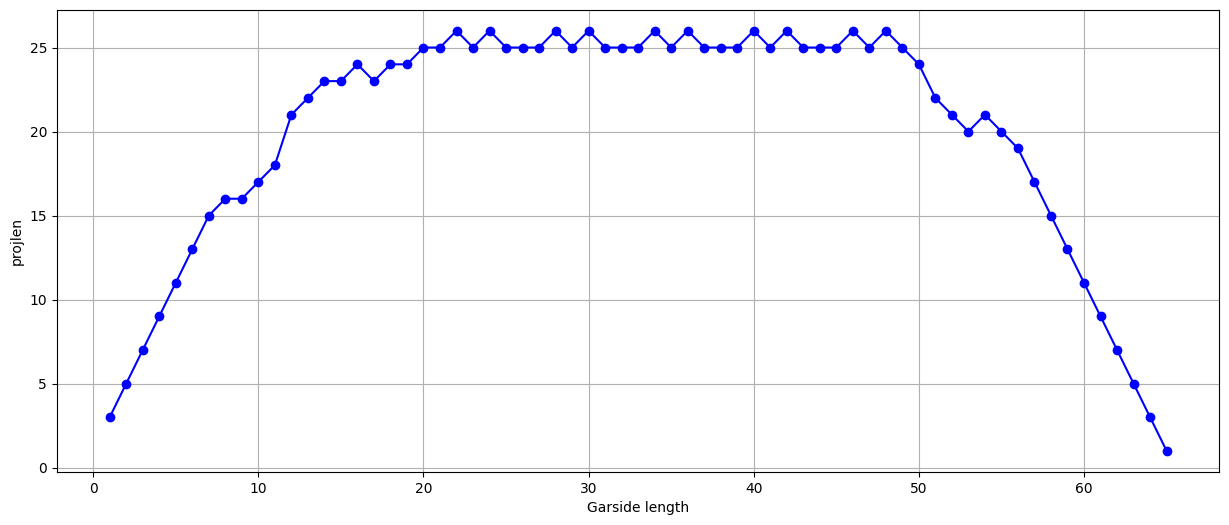

In [17]:
# get the sequence of projlens:

X = [polymat.projectivise(polymat.from_matrix(evaluations[i])).shape[-1] for i in range(len(can_factors))]

import matplotlib.pyplot as plt

garside_lengths = range(1, len(X)+1)
proj_lengths = X

plt.figure(figsize=(15, 6)) 

# Create the line plot
plt.plot(garside_lengths, proj_lengths, marker='o', linestyle='-', color='b')

# Set axis labels and title
plt.xlabel('Garside length')
plt.ylabel('projlen')
#plt.title('Line Plot of Sequence X')

# Show the plot
plt.grid(True)
plt.show()